# Feature Engineering - 2

Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

Ans. Min-Max Scaling, also known as normalization, transforms the data into a range of [0,1] by subtracting the minimum value and dividing by the range. This is useful when the scale of the features varies widely, as it ensures that all features have equal importance in the analysis.

Formula used:

$$ x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

E.g.

In [22]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

min_max = MinMaxScaler()

df=pd.DataFrame(min_max.fit_transform(tips[['total_bill']].round(3) ), columns=['Scaled total_bill'])

tips=pd.concat([tips,df], axis=1)

print("Scaled total bill using min max scaling :")
tips.head(10)

Scaled total bill using min max scaling :


,total_bill,tip,sex,smoker,day,time,size,Scaled total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775
5,25.29,4.71,Male,No,Sun,Dinner,4,0.465438
6,8.77,2.00,Male,No,Sun,Dinner,2,0.119397
7,26.88,3.12,Male,No,Sun,Dinner,4,0.498743
8,15.04,1.96,Male,No,Sun,Dinner,2,0.250733
9,14.78,3.23,Male,No,Sun,Dinner,2,0.245287


Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

Ans. A unit vector is a vector of length 1, and the L2 norm is the square root of the sum of the squared values. Therefore, the L2 norm of a unit vector is 1.

The Unit Vector technique, also known as Normalization, is a feature scaling method used in machine learning to scale features within a dataset to have a unit norm. This means that each feature vector is scaled down such that its Euclidean norm (magnitude) becomes 1. This technique is particularly useful when the scale of features varies widely, and you want to ensure that all features contribute equally to the learning process.

Min-Max scaling, on the other hand, scales features linearly to a specific range (usually [0, 1]), maintaining the relative distances between data points. Min-Max scaling is more appropriate when you want to preserve the original distribution of the data and the features are not necessarily orthogonal.

Example of Unit Vector technique:

In [24]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()

df=pd.DataFrame(normalizer.fit_transform(tips[['total_bill','tip']].round(3) ), columns=['Normalized total_bill','Normalized tip'])

tips=pd.concat([tips,df], axis=1)

print("Normalized total bill using Unit Vector technique :")
tips.head(10)



Normalized total bill using Unit Vector technique :


,total_bill,tip,sex,smoker,day,time,size,Scaled total_bill,Normalized total_bill,Normalized tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,0.998238,0.059342
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,0.987357,0.158512
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,0.986407,0.164323
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,0.990372,0.138435
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,0.989395,0.145251
5,25.29,4.71,Male,No,Sun,Dinner,4,0.465438,0.983096,0.183091
6,8.77,2.00,Male,No,Sun,Dinner,2,0.119397,0.974969,0.222342
7,26.88,3.12,Male,No,Sun,Dinner,4,0.498743,0.993331,0.115297
8,15.04,1.96,Male,No,Sun,Dinner,2,0.250733,0.991615,0.129226
9,14.78,3.23,Male,No,Sun,Dinner,2,0.245287,0.976943,0.213500


Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

Ans. Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis. It aims to transform a high-dimensional dataset into a lower-dimensional representation while preserving the most important information or variability in the data. PCA achieves this by identifying the principal components, which are linear combinations of the original features that capture the most variance in the data.

Here's a simplified explanation of how PCA works:

- Standardize the Data: PCA requires the data to be standardized (mean-centered and scaled by the standard deviation) to ensure that all features contribute equally.
- Calculate Covariance Matrix: PCA computes the covariance matrix of the standardized data to understand how the features vary together.
- Calculate Eigenvectors and Eigenvalues: The eigenvectors and eigenvalues of the covariance matrix are calculated. Eigenvectors represent the directions of maximum variance, and eigenvalues represent the amount of variance along each eigenvector.
- Select Principal Components: PCA sorts the eigenvectors by their corresponding eigenvalues in decreasing order. The eigenvectors with the highest eigenvalues (i.e., those capturing the most variance) are selected as the principal components.
- Projection: The data is projected onto the new coordinate system defined by the selected principal components. The original high-dimensional data is transformed into a lower-dimensional space.

PCA is commonly used for various purposes, including data visualization, noise reduction, and improving model efficiency by reducing the number of features.

Example of PCA on wine quality dataset is as follows:

In [25]:
import pandas as pd
df=pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
from sklearn.decomposition import PCA

pca=PCA()
X = df.iloc[:,:-1]
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262


In [29]:
comp_df = pd.DataFrame(component_names, columns=['Component',])
evar_df = pd.DataFrame(pca.explained_variance_ratio_.round(4)*100,columns=['Percentage of variance explained'])
pca_exp_var = pd.concat([comp_df,evar_df], axis=1)
pca_exp_var

,Component,Percentage of variance explained
0,PC1,94.66
1,PC2,4.84
2,PC3,0.26
3,PC4,0.15
4,PC5,0.09
5,PC6,0.00
6,PC7,0.00
7,PC8,0.00
8,PC9,0.00
9,PC10,0.00


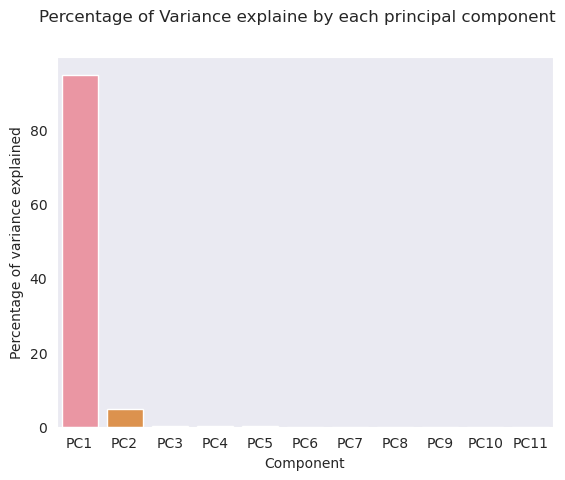

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('dark')
sns.set_palette('Set1')
sns.barplot(x=pca_exp_var['Component'], y=pca_exp_var['Percentage of variance explained'])
plt.suptitle('Percentage of Variance explaine by each principal component')
plt.show()

We see that $94.66\%$ of variance is explained by one Principal Component, PC1.

Thus if we use Principal Component Analysis, only 1 principal component is required to explain 90% of the variance in the data. In this way, PCA helps in dimensionality reduction.

Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

Ans. **PCA (Principal Component Analysis)** is closely related to **Feature Extraction** in the context of dimensionality reduction. While both techniques aim to reduce the number of features while retaining the most important information, they are applied in slightly different contexts:

- **PCA:** PCA is primarily used for reducing the dimensionality of the data by transforming it into a new coordinate system defined by the principal components. These principal components are linear combinations of the original features, and they capture the maximum variance in the data. PCA is often used when you have a large number of correlated features and want to create a new set of uncorrelated features (principal components) that capture the essential information.

- **Feature Extraction:** Feature extraction involves transforming the original features into a new set of features using various techniques, often with a specific goal in mind, such as enhancing a particular aspect of the data or simplifying its representation. Feature extraction can involve techniques beyond just variance maximization, and it's generally used to create a more meaningful representation of the data for downstream tasks.

**Using PCA for Feature Extraction:**

PCA can be used as a feature extraction technique when the primary goal is to reduce the dimensionality of the data while retaining as much variance as possible. Instead of using all the principal components obtained from PCA, you can choose to keep a subset of them that capture the desired amount of variance. These selected principal components serve as the new set of features.

**Example of Using PCA for Feature Extraction:**

Let's consider an example using the Iris dataset, which contains measurements of different iris flower species. We'll use PCA for feature extraction to reduce the four original features (sepal length, sepal width, petal length, and petal width) to two dimensions while retaining as much variance as possible.

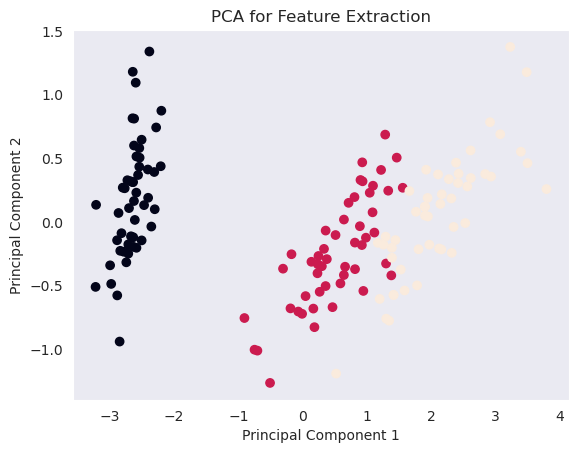

In [37]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Initialize PCA with two principal components
pca = PCA(n_components=2)

# Perform PCA for feature extraction
X_transformed = pca.fit_transform(X)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Feature Extraction')
plt.show()

In this example, PCA reduces the four original features of the Iris dataset to two principal components. The scatter plot of the transformed data shows how the data is projected onto the new feature space. The reduced-dimensional data points can now be used for visualization, clustering, or other downstream tasks.

Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

Ans. The solution using sample data is as follows:

In [15]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data for the food delivery service recommendation system
num_restaurants = 100
restaurant_ids = np.arange(1, num_restaurants + 1)
restaurant_names = [f"Restaurant {i}" for i in restaurant_ids]
prices = np.random.uniform(5, 30, num_restaurants)  # Simulated price range ($5 to $30)
ratings = np.random.uniform(3, 5, num_restaurants)  # Simulated rating (3 to 5)
delivery_times = np.random.randint(15, 60, num_restaurants)  # Simulated delivery time (15 to 59 minutes)

# Create a DataFrame
data = {
    "Restaurant ID": restaurant_ids,
    "Restaurant Name": restaurant_names,
    "Price": prices.round(2),
    "Rating": ratings.round(1),
    "Delivery_Time": delivery_times
}

df = pd.DataFrame(data)

df.head()

,Restaurant ID,Restaurant Name,Price,Rating,Delivery_Time
0,1,Restaurant 1,14.36,3.1,38
1,2,Restaurant 2,28.77,4.3,25
2,3,Restaurant 3,23.30,3.6,22
3,4,Restaurant 4,19.97,4.0,50
4,5,Restaurant 5,8.90,4.8,52


We can use min-max scaling to scale the Price, Rating and Delivery time column.

This can be done as shown:

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

df_scaled=pd.DataFrame(min_max.fit_transform(df[['Price', 'Rating', 'Delivery_Time']] ), columns=['Scaled_Price', 'Scaled_Rating', 'Scaled_Delivery_Time'])

df=pd.concat([df,df_scaled], axis=1)

print("Scaled dataframe using min max scaling :")
df.head(10)

Scaled dataframe using min max scaling :


,Restaurant ID,Restaurant Name,Price,Rating,Delivery_Time,Scaled_Price,Scaled_Rating,Scaled_Delivery_Time
0,1,Restaurant 1,14.36,3.1,38,0.375866,0.05,0.511628
1,2,Restaurant 2,28.77,4.3,25,0.963310,0.65,0.209302
2,3,Restaurant 3,23.30,3.6,22,0.740318,0.30,0.139535
3,4,Restaurant 4,19.97,4.0,50,0.604566,0.50,0.790698
4,5,Restaurant 5,8.90,4.8,52,0.153282,0.90,0.837209
5,6,Restaurant 6,8.90,3.5,54,0.153282,0.25,0.883721
6,7,Restaurant 7,6.45,3.8,34,0.053404,0.40,0.418605
7,8,Restaurant 8,26.65,4.5,49,0.876885,0.75,0.767442
8,9,Restaurant 9,20.03,3.5,39,0.607012,0.25,0.534884
9,10,Restaurant 10,22.70,3.2,49,0.715858,0.10,0.767442


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

Ans. Solution using sample data is as follows:

In [70]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Number of days in the dataset
num_days = 100

# Generate dates
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(num_days)]

# Generate company names
companies = ['Company A', 'Company B', 'Company C']

# Generate financial features
financial_data = {
    'Revenue': np.random.uniform(100000, 1000000, num_days).round(2),
    'Expenses': np.random.uniform(50000, 500000, num_days).round(2),
    'Profit': np.random.uniform(20000, 300000, num_days).round(2),
}

# Generate market trend features
market_trends = {
    'Market_Index': np.random.normal(1000, 200, num_days).round(2),
    'Interest_Rate': np.random.uniform(0.5, 10, num_days).round(2),
    'Unemployment_Rate': np.random.uniform(3, 8, num_days).round(2),
}

# Generate price values for each company
price_data = {
    'Company A': np.random.uniform(10, 50, num_days),
    'Company B': np.random.uniform(20, 60, num_days),
    'Company C': np.random.uniform(30, 70, num_days),
}


# Create the dataset
data = []
for i in range(len(dates)):
    for company in companies:
        row = {'Date': dates[i], 'Company': company}
        row.update({feature: values[i] for feature, values in financial_data.items()})
        row.update({feature: values[i] for feature, values in market_trends.items()})
        row['Price'] = price_data[company][i].round(2)
        data.append(row)

# Create a DataFrame
df = pd.DataFrame(data)

df.head()

,Date,Company,Revenue,Expenses,Profit,Market_Index,Interest_Rate,Unemployment_Rate,Price
0,2023-01-01,Company A,437086.11,64143.13,199768.86,1009.11,1.05,7.19,34.73
1,2023-01-01,Company B,437086.11,64143.13,199768.86,1009.11,1.05,7.19,42.98
2,2023-01-01,Company C,437086.11,64143.13,199768.86,1009.11,1.05,7.19,51.50
3,2023-01-02,Company A,955642.88,336384.69,43559.19,869.68,5.72,5.34,24.76
4,2023-01-02,Company B,955642.88,336384.69,43559.19,869.68,5.72,5.34,53.67


In [71]:
features=['Revenue', 'Expenses', 'Profit', 'Market_Index','Interest_Rate', 'Unemployment_Rate']

from sklearn.decomposition import PCA
pca=PCA()

X=df[features]
X_pca = pca.fit_transform(X).round(3)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-81908.146,-214377.169,-2571.646,-14.352,-4.155,1.370
1,-81908.146,-214377.169,-2571.646,-14.352,-4.155,1.370
2,-81908.146,-214377.169,-2571.646,-14.352,-4.155,1.370
3,432470.864,87938.181,104375.552,161.485,1.193,-0.432
4,432470.864,87938.181,104375.552,161.485,1.193,-0.432


In [72]:
pca_exp_var=pd.DataFrame({'Component':component_names, 
              'Percentage of Variance Explained':pca.explained_variance_ratio_.round(5)*100})
pca_exp_var

,Component,Percentage of Variance Explained
0,PC1,74.840
1,PC2,18.373
2,PC3,6.787
3,PC4,0.000
4,PC5,0.000
5,PC6,0.000


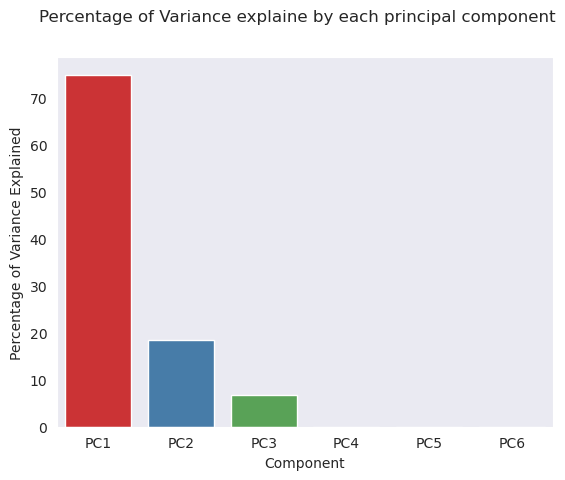

In [67]:
sns.set_style('dark')
sns.set_palette('Set1')
sns.barplot(x=pca_exp_var['Component'], y=pca_exp_var['Percentage of Variance Explained'])
plt.suptitle('Percentage of Variance explaine by each principal component')
plt.show()

Thus we see that only Principal Components PC1, PC2 explain more than $90\%$ of variance of data, so in this way, we can reduce the number of features to just 2.

In [76]:
pd.concat([df[['Date','Company']], X_pca[['PC1','PC2']]], axis=1)        

,Date,Company,PC1,PC2
0,2023-01-01,Company A,-81908.146,-214377.169
1,2023-01-01,Company B,-81908.146,-214377.169
2,2023-01-01,Company C,-81908.146,-214377.169
3,2023-01-02,Company A,432470.864,87938.181
4,2023-01-02,Company B,432470.864,87938.181
...,...,...,...,...
295,2023-04-09,Company B,-404332.557,161045.497
296,2023-04-09,Company C,-404332.557,161045.497
297,2023-04-10,Company A,-327242.509,136765.395
298,2023-04-10,Company B,-327242.509,136765.395


Q7. For a dataset containing the following values: [1,5,10,15,20], perform Min-Max scaling to transform values to a range of -1 to 1.

In [18]:
import pandas as pd

# Create a pandas DataFrame with the given values
data = {
    "Values": [1, 5, 10, 15, 1, 5, 10, 15, 20, 20]
}

df = pd.DataFrame(data)
df


,Values
0,1
1,5
2,10
3,15
4,1
5,5
6,10
7,15
8,20
9,20


In [19]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler(feature_range=(-1,1))

df_scaled=pd.DataFrame(min_max.fit_transform(df[['Values']] ), columns=['Scaled_values'])

df=pd.concat([df,df_scaled], axis=1)

print("Scaled dataframe using min max scaling :")
df

Scaled dataframe using min max scaling :


,Values,Scaled_values
0,1,-1.000000
1,5,-0.578947
2,10,-0.052632
3,15,0.473684
4,1,-1.000000
5,5,-0.578947
6,10,-0.052632
7,15,0.473684
8,20,1.000000
9,20,1.000000


Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Ans. Soution using random data is as shown:

In [96]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate sample data for the dataset
num_samples = 50
heights = np.random.uniform(150, 180, num_samples)  # Simulated height in centimeters (150 to 189)
weights = np.random.uniform(50, 100, num_samples)  # Simulated weight in kilograms (50 to 99)
ages = np.random.randint(18, 65, num_samples)  # Simulated age (18 to 64)
genders = np.random.choice(["Male", "Female"], num_samples)  # Simulated gender
blood_pressures = np.random.randint(80, 140, num_samples)  # Simulated blood pressure in mmHg (80 to 139)

# Create a DataFrame
data = {
    "Height (cm)": heights.round(2),
    "Weight (kg)": weights.round(2),
    "Age": ages,
    "Gender": genders,
    "Blood Pressure (mmHg)": blood_pressures
}

df = pd.DataFrame(data)

df.head(10)


,Height (cm),Weight (kg),Age,Gender,Blood Pressure (mmHg)
0,161.24,98.48,49,Female,131
1,178.52,88.76,56,Female,113
2,171.96,96.97,49,Male,85
3,167.96,94.74,21,Female,101
4,154.68,79.89,47,Male,90
5,154.68,96.09,54,Female,127
6,151.74,54.42,40,Male,95
7,175.99,59.80,56,Female,112
8,168.03,52.26,62,Female,88
9,171.24,66.27,32,Female,139


In [97]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
enc_gender=encoder.fit_transform(df[['Gender']])

ohe_enc_df = pd.DataFrame(enc_gender.toarray(),columns=encoder.get_feature_names_out())
df.drop(['Gender'], axis=1, inplace=True)

print('One Hot Encoding output : ')
new_df=pd.concat([df,ohe_enc_df], axis=1)
new_df.head()

One Hot Encoding output : 


,Height (cm),Weight (kg),Age,Blood Pressure (mmHg),Gender_Female,Gender_Male
0,161.24,98.48,49,131,1.0,0.0
1,178.52,88.76,56,113,1.0,0.0
2,171.96,96.97,49,85,0.0,1.0
3,167.96,94.74,21,101,1.0,0.0
4,154.68,79.89,47,90,0.0,1.0


In [101]:
from sklearn.decomposition import PCA

pca=PCA()
df_pca=pca.fit_transform(new_df).round(3)

component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-28.696,-12.413,9.538,-0.583,-0.535,-0.0
1,-9.837,-17.292,-4.317,13.368,-0.404,-0.0
2,14.596,-30.238,6.066,4.884,0.620,0.0
3,7.289,-8.248,28.857,7.006,-0.841,0.0
4,14.704,-12.022,0.683,-11.193,0.451,0.0


In [102]:
pca_exp_var=pd.DataFrame({'Component':component_names, 
              'Percentage of Variance Explained':pca.explained_variance_ratio_.round(5)*100})
pca_exp_var

,Component,Percentage of Variance Explained
0,PC1,40.680
1,PC2,33.115
2,PC3,17.489
3,PC4,8.658
4,PC5,0.058
5,PC6,0.000


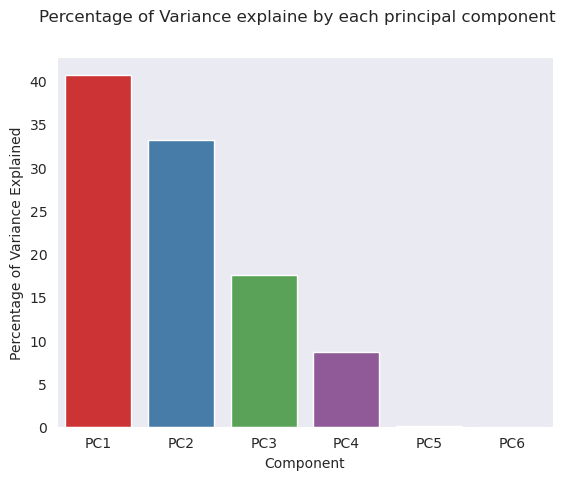

In [103]:
sns.set_style('dark')
sns.set_palette('Set1')
sns.barplot(x=pca_exp_var['Component'], y=pca_exp_var['Percentage of Variance Explained'])
plt.suptitle('Percentage of Variance explaine by each principal component')
plt.show()

We see that after PCA, the first 3 features explain more than 90% of variance of our data, so we will select only the first 3 features.